In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
keras.__version__

'3.10.0'

In [4]:
fmnist_data = keras.datasets.fashion_mnist

In [58]:
(x_train, y_train), (x_test, y_test) = fmnist_data.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
y_test.shape

(10000,)

In [10]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [11]:
x_train[1,]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

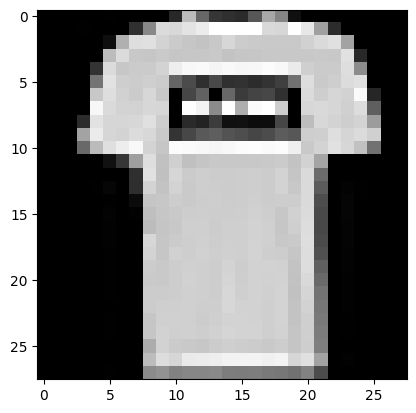

In [12]:
plt.imshow(x_train[1,], cmap='gray')

In [59]:
# Normalization
x_train, x_test = x_train.astype('float32')/255.0,x_test.astype('float32')/255.0

Define The Model

In [60]:
# Second Format(Recommended)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation='relu'),#hidden layer
    keras.layers.Dense(75, activation='relu'),#hidden layer
    keras.layers.Dense(10, activation='softmax')#output layer
    ]
)

D:\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [61]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           760 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,835 (339.20 KB)

 Trainable params: 86,835 (339.20 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.layers

[<Flatten name=flatten_2, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>,
 <Dense name=dense_12, built=True>]

In [63]:
weights, bias = model.layers[1].get_weights()

In [64]:
weights

array([[ 0.01258272,  0.00802149,  0.01002409, ...,  0.00414666,
         0.01553604,  0.07555702],
       [ 0.00283521,  0.06037624, -0.05154144, ..., -0.02915893,
        -0.03120609, -0.04890766],
       [ 0.02954768,  0.03169852,  0.05831441, ...,  0.00926551,
        -0.05325779,  0.02236878],
       ...,
       [-0.0216851 , -0.05248446,  0.06378311, ..., -0.00342528,
        -0.07808537, -0.07016081],
       [ 0.07550929, -0.05365714,  0.05401453, ..., -0.04926423,
         0.01833703,  0.05552772],
       [-0.01576935,  0.0089752 ,  0.03709403, ...,  0.00583667,
         0.00091819,  0.03046421]], dtype=float32)

In [65]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [66]:
weights.shape, bias.shape

((784, 100), (100,))

Compile Model

In [67]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Fit Model

In [68]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7630 - loss: 0.6794 - val_accuracy: 0.8440 - val_loss: 0.4324
Epoch 2/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8576 - loss: 0.3914 - val_accuracy: 0.8591 - val_loss: 0.3871
Epoch 3/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8717 - loss: 0.3500 - val_accuracy: 0.8670 - val_loss: 0.3618
Epoch 4/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8840 - loss: 0.3172 - val_accuracy: 0.8746 - val_loss: 0.3468
Epoch 5/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8853 - loss: 0.3080 - val_accuracy: 0.8791 - val_loss: 0.3376
Epoch 6/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8932 - loss: 0.2861 - val_accuracy: 0.8738 - val_loss: 0.3459
Epoch 7/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8960 - loss: 0.2730 - val_accuracy: 0.8846 - val_loss: 0.3297
Epoch 8/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9015 - loss: 0.2612 - 

In [69]:
print(history.history)

{'accuracy': [0.8155490159988403, 0.8617058992385864, 0.8739804029464722, 0.8837646842002869, 0.8855686187744141, 0.8941764831542969, 0.8956666588783264, 0.9020196199417114, 0.9043921828269958, 0.9087451100349426, 0.9116666913032532, 0.9142156839370728, 0.9160000085830688, 0.9203333258628845, 0.9211961030960083, 0.9248823523521423, 0.9273333549499512, 0.9276078343391418, 0.9295294284820557, 0.9318431615829468, 0.9327647089958191, 0.9353333115577698, 0.9375097751617432, 0.9381568431854248, 0.9402745366096497, 0.9405490159988403, 0.9426470398902893, 0.9437450766563416, 0.9452353119850159, 0.9460588097572327, 0.948411762714386, 0.9482548832893372, 0.9490980505943298, 0.950509786605835, 0.951941192150116, 0.9530588388442993, 0.9531568884849548, 0.9551176428794861, 0.9558431506156921, 0.955294132232666, 0.9574902057647705, 0.9589215517044067, 0.957058846950531, 0.9589999914169312, 0.9590196013450623, 0.9599803686141968, 0.9609804153442383, 0.9619411826133728, 0.9628039002418518, 0.962215662

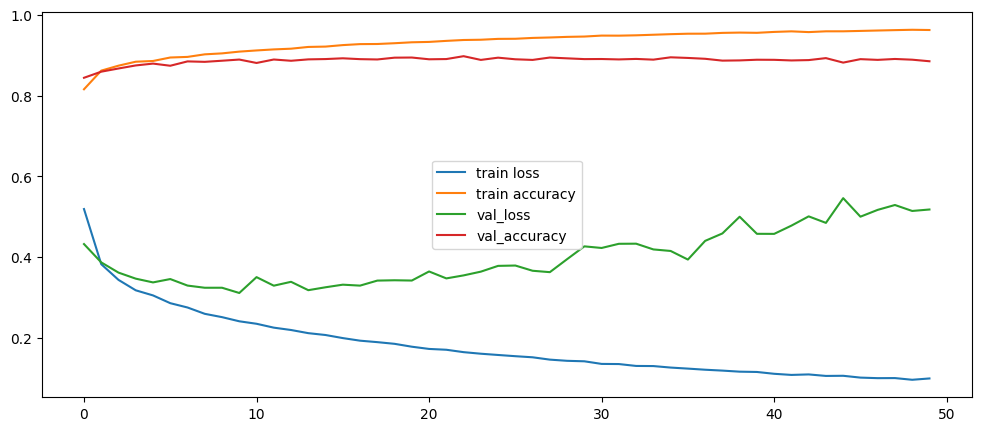

In [70]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history.history['loss'], label='train loss')
ax.plot(history.history['accuracy'], label='train accuracy')
ax.plot(history.history['val_loss'], label='val_loss')
ax.plot(history.history['val_accuracy'], label='val_accuracy')
ax.legend()

Model Evaluation

In [71]:
model.evaluate(x_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.8813 - loss: 0.5864


[0.5764054656028748, 0.8838000297546387]

In [72]:
x3 = x_test[1:4, :, :]

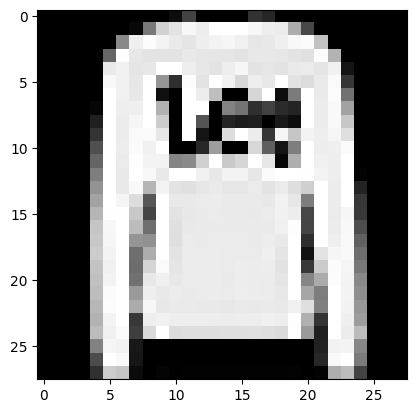

In [73]:
plt.imshow(x3[0], cmap='gray')

In [74]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


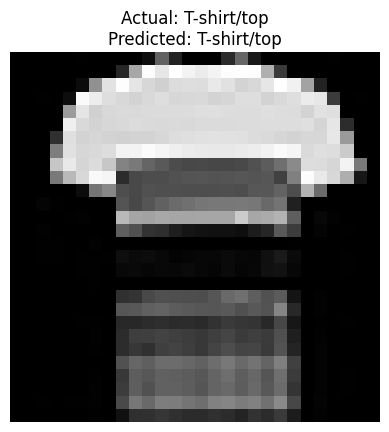

In [76]:
np.random.seed(42)
index = np.random.randint(0, len(x_test))
img = x_test[index:index+1]
pred = model.predict(img)
pred_class = np.argmax(pred)

# Show Picture
plt.imshow(img[0], cmap='gray')
plt.title(f"Actual: {class_names[y_test[index]]}\nPredicted: {class_names[pred_class]}")
plt.axis('off')
plt.show()